# Softmax, ReLU를 활용한 숫자 맞추기

## Softmax 함수 정의

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def Softmax(x) :
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)

    return ex / np.sum(ex)

## 입력 데이터

In [62]:
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]

# 정답지
D = np.array([[[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]])

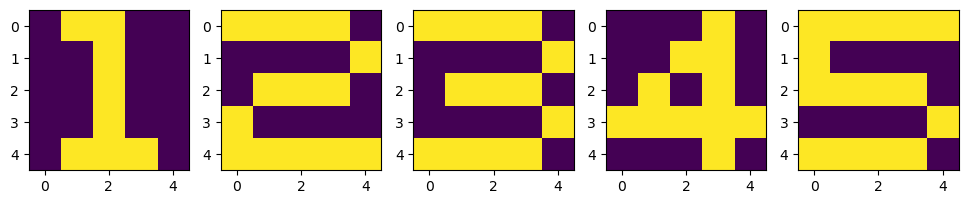

In [63]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

## ReLU 함수 정의

In [64]:
def ReLU(x) :
    return np.maximum(0, x)

## 순방향연산 함수 정의

In [65]:
def calcOutput_ReLU(W1, W2, W3, W4, x) :
    # W1 shape=(20, 25) / x shape = (25, 1)
    v1 = np.matmul(W1, x)   # v1 shape = (20, 1)
    y1 = ReLU(v1)

    # W2 shape=(20, 20)
    v2 = np.matmul(W2, y1)  # v2 shape = (20, 1)
    y2 = ReLU(v2)

    # W3 shape=(20, 20)
    v3 = np.matmul(W3, y2)  # v3 shape = (20, 1)
    y3 = ReLU(v3)
    
    # W4 shape=(5, 20)
    v = np.matmul(W4, y3)   # v shape = (5, 1)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3

## 역전파 함수 정의

In [66]:
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3) :
    # 1. 가중치 W4에 대한 전체 오차 E 변화량
    e = d - y
    delta = e

    # 2. 가중치 W3에 대한 전체 오차 E 변화량
    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3

    # 3. 가중치 W2에 대한 전체 오차 E 변화량
    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    # 4. 가중치 W1에 대한 전체 오차 E 변화량
    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1, delta2, delta3

## 가중치 연산 함수 정의

In [67]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4) :
    # 1. 가중치 W4 업데이트
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4

    # 2. 가중치 W3 업데이트
    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3

    # 3. 가중치 W2 업데이트
    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2

    # 4. 가중치 W1 업데이트
    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

## 가중치 업데이트

In [68]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha) :
    for k in range(5) :
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W3, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

    return W1, W2, W3, W4

## 학습

In [69]:
# 가중치 랜덤 초기화
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01
for epoch in tqdm(range(10000)) :
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

100%|██████████| 10000/10000 [00:02<00:00, 4015.28it/s]


## 학습 완료된 가중치로 검증

In [70]:
# 순전파연산 함수 재정의
def verify_algorithm(x, W1, W2, W3, W4) :
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y

In [71]:
# 검증
N = 5
for k in range(N) :
    x = np.reshape(X[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    print("Y = {} :".format(k+1))
    # 라벨 데이터로 원핫 인코딩 값을 주었으므로 np.argmax를 통해 가장 높은 확률값을 가지는 인덱스 추출
    # 인덱스 값이므로 +1해서 어떤 클래스(1, 2, 3, 4, 5)에 해당하는지 출력
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('---------------------')

Y = 1 :
[1]
[[8.46346224e-01]
 [9.25254598e-05]
 [1.53561251e-01]
 [1.69331994e-17]
 [7.08270417e-15]]
---------------------
Y = 2 :
[2]
[[1.29131349e-04]
 [9.99013257e-01]
 [8.57611808e-04]
 [6.31588306e-42]
 [6.41459612e-25]]
---------------------
Y = 3 :
[1]
[[6.21279139e-01]
 [2.16148253e-01]
 [1.62572608e-01]
 [4.58715586e-46]
 [2.60740094e-27]]
---------------------
Y = 4 :
[2]
[[2.17797879e-02]
 [9.78220140e-01]
 [4.01509030e-08]
 [5.16440897e-26]
 [3.21753099e-08]]
---------------------
Y = 5 :
[1]
[[7.35538820e-01]
 [2.64142621e-01]
 [3.18558728e-04]
 [1.89207093e-41]
 [6.48041410e-23]]
---------------------


## 테스트 데이터로 검증

In [72]:
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X_test[:, :, 2] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0]]
X_test[:, :, 3] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,0]]
X_test[:, :, 4] = [[0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0]]

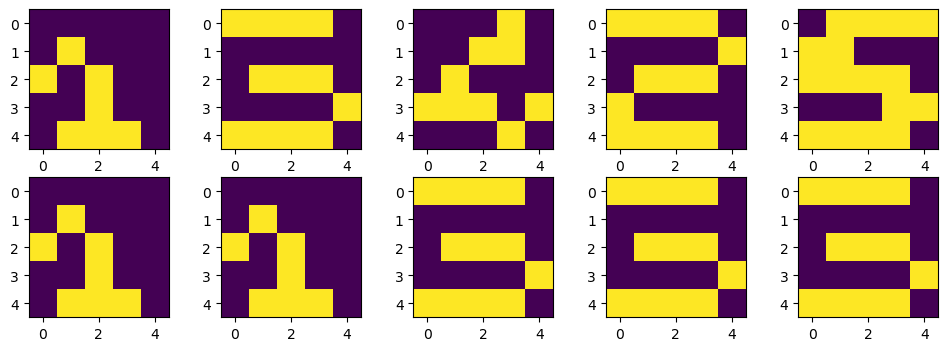

In [73]:
# 예측
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis = 0) + 1
    
plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k]) # 원본 데이터

    plt.subplot(2, 5, k+6)
    plt.imshow(X_test[:, :, learning_result[k][0] - 1]) # 예측 데이터
plt.show()

## Dropout 함수 정의

In [74]:
# dropout 함수
def Dropout(y, ratio):
    ym = np.zeros_like(y) 

    num = round(y.size * (1 - ratio)) 
    # y.size까지의 수 중 num 개수만큼 랜덤으로 추출
    idx = np.random.choice(y.size, num, replace = True)
    ym[idx] = 1.0 / (1.0 - ratio)

    return ym


In [77]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-x))

## Dropout을 적용시킨 순방향연산 함수 정의

In [78]:
def calc_output_dropout(W1, W2, W3, W4, x):  
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)

    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y1 = y2 * Dropout(y2, 0.2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, y1, y2, y3, v1, v2, v3

## 역전파 및 가중치 업데이트

In [80]:
# 역전파를 이용한 델타 계산
def backprop_dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = y3*(1 - y3)*e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = y2*(1 - y2)*e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = y1*(1 - y1)*e1

    return delta, delta1, delta2, delta3


# 가중치 업데이트
def Deepdropout(W1, W2, W3, W4, X, D):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d =D[k, :].T
        
        y, y1, y2, y3, v1, v2, v3 = calc_output_dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backprop_dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

## 학습 및 예측














100%|██████████| 10000/10000 [00:01<00:00, 8191.36it/s]
Exception ignored in: <function tqdm.__del__ at 0x1182513a0>
Traceback (most recent call last):
  File "/Users/taeheon/miniforge3/envs/deeplearning/lib/python3.8/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/Users/taeheon/miniforge3/envs/deeplearning/lib/python3.8/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


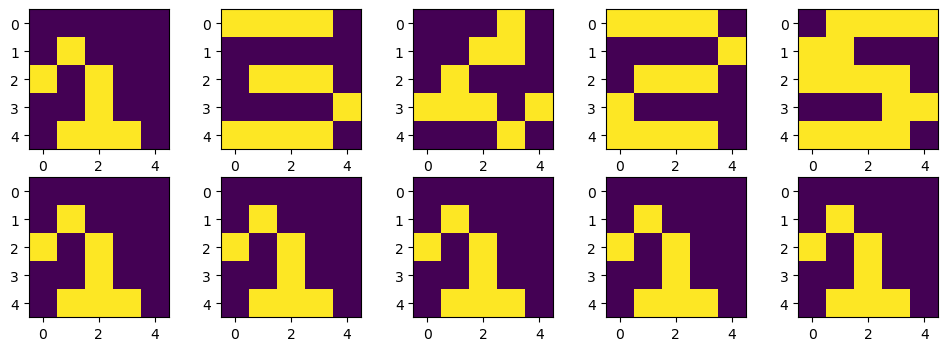

In [82]:
# 학습
W1 = 2*np.random.random((20, 25)) -1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

for epoch in tqdm(range(10000)):
    W1, W2, W3, W4 = Deepdropout(W1, W2, W3, W4, X, D)
    
    
# 테스트 데이터 다시 예측
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis = 0) + 1
    

plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k]) # 원본 데이터

    plt.subplot(2, 5, k+6)
    plt.imshow(X_test[:, :, learning_result[k][0] - 1]) # 예측 데이터
plt.show()